### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

Primi 10 paesi per consumo totale di alcol:
                country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
61               France                          11.8
45       Czech Republic                          11.8
141  Russian Federation                          11.5
99           Luxembourg                          11.4
155            Slovakia                          11.4
81              Ireland                          11.4

Media beer_servings: 106.16062176165804
Media wine_servings: 49.45077720207254
Media spirit_servings: 80.99481865284974

Paese con massimo alcohol_index: Andorra - 231.66666666666666

Paesi con più di 100 birre all'anno:
               country  beer_servings
3              Andorra            245
4               Angola            217
5    Antigua & Barbuda    

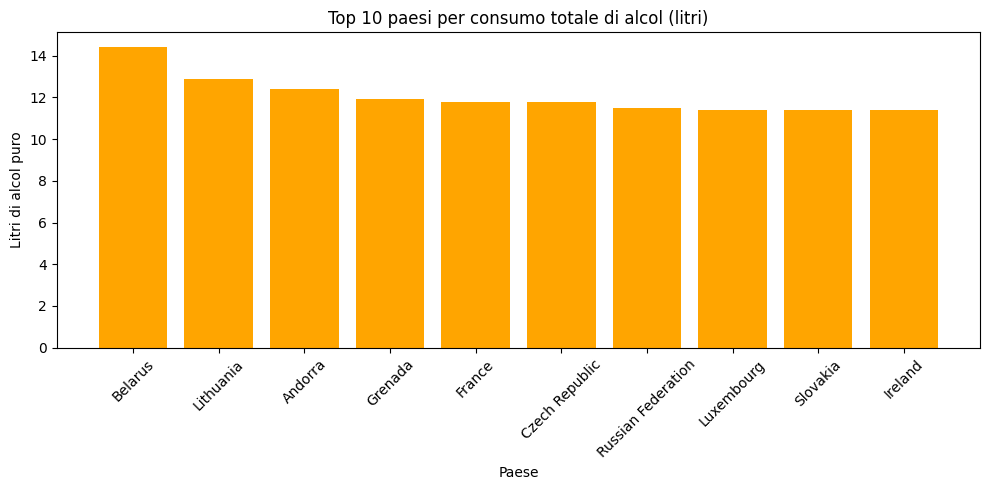

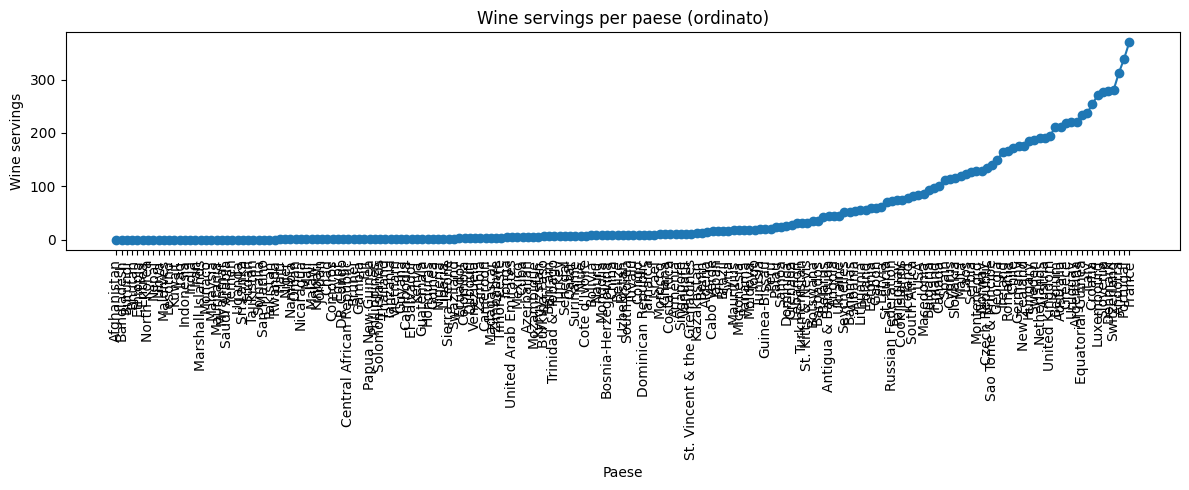

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#dataset
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

#Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)
top10 = df.sort_values("total_litres_of_pure_alcohol", ascending=False).head(10)
print("Primi 10 paesi per consumo totale di alcol:")
print(top10[["country", "total_litres_of_pure_alcohol"]])

#Calcola la media del consumo di birra, vino e distillati
print("\nMedia beer_servings:", df["beer_servings"].mean())
print("Media wine_servings:", df["wine_servings"].mean())
print("Media spirit_servings:", df["spirit_servings"].mean())

#Crea una nuova colonna alcohol_index
df["alcohol_index"] = (df["beer_servings"] + df["wine_servings"] + df["spirit_servings"]) / 3

#Trova il paese con il valore massimo di alcohol_index
max_index_country = df.loc[df["alcohol_index"].idxmax()]
print("\nPaese con massimo alcohol_index:", max_index_country["country"], "-", max_index_country["alcohol_index"])

#Filtra solo i paesi che consumano più di 100 birre all’anno
beer100 = df[df["beer_servings"] > 100]
print("\nPaesi con più di 100 birre all'anno:")
print(beer100[["country", "beer_servings"]])

#Bar chart dei 10 paesi con più consumo totale
plt.figure(figsize=(10,5))
plt.bar(top10["country"], top10["total_litres_of_pure_alcohol"], color='orange')
plt.xticks(rotation=45)
plt.title("Top 10 paesi per consumo totale di alcol (litri)")
plt.ylabel("Litri di alcol puro")
plt.xlabel("Paese")
plt.tight_layout()
plt.show()

#Line plot con wine_servings ordinato per paese
df_sorted = df.sort_values("wine_servings")
plt.figure(figsize=(12,5))
plt.plot(df_sorted["country"], df_sorted["wine_servings"], marker='o')
plt.xticks(rotation=90)
plt.title("Wine servings per paese (ordinato)")
plt.ylabel("Wine servings")
plt.xlabel("Paese")
plt.tight_layout()
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

Stipendio medio annuale per paese:
job_country
Belarus                     400000.000000
Russia                      292500.000000
Bahamas                     201511.619048
Dominican Republic          157500.000000
Northern Mariana Islands    155485.500000
                                ...      
Tanzania                              NaN
Togo                                  NaN
Trinidad and Tobago                   NaN
Venezuela                             NaN
Yemen                                 NaN
Name: salary_year_avg, Length: 160, dtype: float64

Numero totale di offerte di lavoro per paese:
job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
                   ...  
Guinea                 4
Lesotho                3
Mauritania             3
Bhutan                 3
Maldives               2
Name: count, Length: 160, dtype: int64

Intervallo stipendi per paese:
             min_salary  max_salary

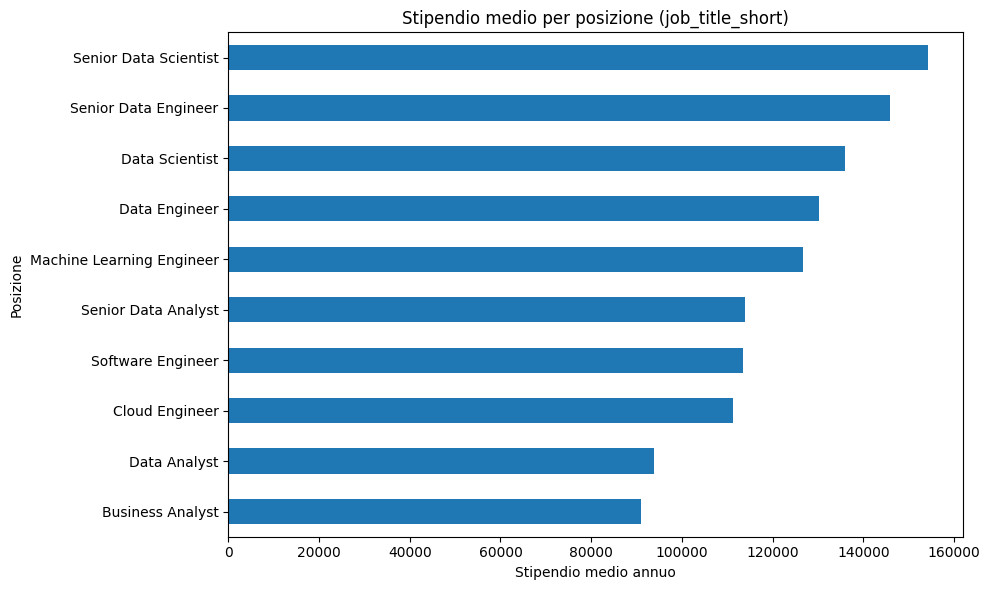

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

#Stipendio medio annuale per paese
salary_mean = df.groupby('job_country')['salary_year_avg'].mean().sort_values(ascending=False)
print("Stipendio medio annuale per paese:")
print(salary_mean)

#Numero totale di offerte di lavoro per paese
job_count = df['job_country'].value_counts()
print("\nNumero totale di offerte di lavoro per paese:")
print(job_count)

#Intervallo degli stipendi (min e max) per paese
salary_min = df.groupby('job_country')['salary_year_avg'].min()
salary_max = df.groupby('job_country')['salary_year_avg'].max()
salary_range = pd.DataFrame({'min_salary': salary_min, 'max_salary': salary_max})
print("\nIntervallo stipendi per paese:")
print(salary_range)

#Grafico a barre orizzontali dello stipendio medio per job_title_short
job_salary = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
job_salary.plot(kind='barh')
plt.title('Stipendio medio per posizione (job_title_short)')
plt.xlabel('Stipendio medio annuo')
plt.ylabel('Posizione')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()